In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import * 

In [3]:
def random_direction(size):
    vec = np.random.uniform(-1, 1, size=size)
    return vec/np.linalg.norm(vec)


def objective(x, q=1):
    if q == 1:
        return 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
    elif q == 2:
        return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
    else:
        raise ValueError('Bad question number')
        
    
def find_best_lambda(x, lbd, q):
    sol = solve(diff(objective(x, q)), lbd)
    sol = np.array([float(re(i)) for i in sol])
    hess = diff(diff(objective(x, 1)))
    hess_vals = np.array([float(hess.evalf(subs={lbd: i})) for i in sol])
   
    candidates = [i for i in range(len(sol)) if hess_vals[i] > 0]
    hess_vals = [hess_vals[i] for i in candidates]
    
    try:
        return sol[candidates[np.argmax(hess_vals)]]
    except:
        return 'None'
    
    
def random_walk(x_0, q):
    
    # Parameters to start off
    x_0 = np.asarray(x_0)
    x = x_0
    u = random_direction(x.shape)
    
    # Other controllers
    count = 0
    feasible_count = 0
    done = False
    lbd = Symbol('lambda')
    
    # Movement of point
    points = []
    
    # Loop
    while not done:
        
        # Find next symbolic point 
        x_symb = x + lbd * u
        
        # Find best lambda and compute new vector
        step_size = find_best_lambda(x_symb, lbd, q)
        
        if isinstance(step_size, str):
            break
        else:
            x_new = x + step_size * u
        
        # Decision
        if objective(x_new, q) < objective(x, q):
            x = x_new
            feasible_count += 1
        elif objective(x_new, q) >= objective(x, q):
            u = random_direction(x.shape)
            
        if count % 100 == 0:
            print("Iteration {:3d} - x {} - f(x) {:.5f}".format(
                count, x, objective(x, q)
            ))
        points.append(x)

        count += 1
        if count > 1000:
            done = True
            
    return x, feasible_count, np.array(points)

In [ ]:
opt, feasible_count, points = random_walk([-0.5,0.5], q=1)

Iteration   0 - x [-0.44294405  0.19298931] - f(x) 2.08312
Iteration 100 - x [1.0340294  1.06935202] - f(x) 0.00116
Iteration 200 - x [1.03403132 1.06935097] - f(x) 0.00116
Iteration 300 - x [1.03305532 1.06726044] - f(x) 0.00109
Iteration 400 - x [1.03305532 1.06726044] - f(x) 0.00109


In [ ]:
opt

In [ ]:
feasible_count

In [ ]:
final_points = [[-0.5,0.5]]
for i in points.tolist():
    if i in final_points:
        continue
    else:
        final_points.append(i)
        
final_points = np.array(final_points)

In [ ]:
def track_movements(q, points):
    x = np.linspace(-5, 5, 1000)
    y = np.linspace(-5, 5, 1000)
    xx, yy = np.meshgrid(x, y)
    zz = np.array([objective(a, q) for a in np.c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)
    
    plt.figure(figsize=(12, 10))
    plt.pcolormesh(xx, yy, zz)
    plt.colorbar()
    plt.plot(points[:, 0], points[:, 1], color='yellow', linewidth=2)
    plt.scatter(points[:, 0], points[:, 1], c='yellow', s=40, edgecolor='yellow')
    plt.text(points[0][0]-0.3, points[0][1]-0.2, 'start', color='yellow', fontsize=12, fontweight='bold')
    plt.text(points[-1][0]+0.1, points[-1][1]+0.1, 'end', color='yellow', fontsize=12, fontweight='bold')
    plt.axvline(points[-1][0], ymin=0, ymax=1, color='white', linewidth=1)
    plt.axhline(points[-1][1], xmin=0, xmax=1, color='white', linewidth=1)
    plt.grid(alpha=0.8)
    plt.title('Random walk method with direction exploitation with initial [-0.5,0.5]')
    plt.show()

In [ ]:
track_movements(1, final_points)

In [53]:
opt, feasible_count, points = random_walk([0, 0], q=2)

Iteration   0 - x [1.94351601 2.06270114] - f(x) 1.76891


In [54]:
opt

array([1.06874236, 2.94175084])

In [55]:
feasible_count

5

In [56]:
final_points = [[0, 0]]
for i in points.tolist():
    if i in final_points:
        continue
    else:
        final_points.append(i)
        
final_points = np.array(final_points)

In [57]:
def track_movements(q, points):
    x = np.linspace(-5, 5, 1000)
    y = np.linspace(-5, 5, 1000)
    xx, yy = np.meshgrid(x, y)
    zz = np.array([objective(a, q) for a in np.c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)
    
    plt.figure(figsize=(12, 10))
    plt.pcolormesh(xx, yy, zz)
    plt.colorbar()
    plt.plot(points[:, 0], points[:, 1], color='yellow', linewidth=2)
    plt.scatter(points[:, 0], points[:, 1], c='yellow', s=40, edgecolor='yellow')
    plt.text(points[0][0]-0.3, points[0][1]-0.2, 'start', color='yellow', fontsize=12, fontweight='bold')
    plt.text(points[-1][0]+0.1, points[-1][1]+0.1, 'end', color='yellow', fontsize=12, fontweight='bold')
    plt.axvline(points[-1][0], ymin=0, ymax=1, color='white', linewidth=1)
    plt.axhline(points[-1][1], xmin=0, xmax=1, color='white', linewidth=1)
    plt.grid(alpha=0.8)
    plt.title('Random walk method with direction exploitation with initial [0,0]')
    plt.show()

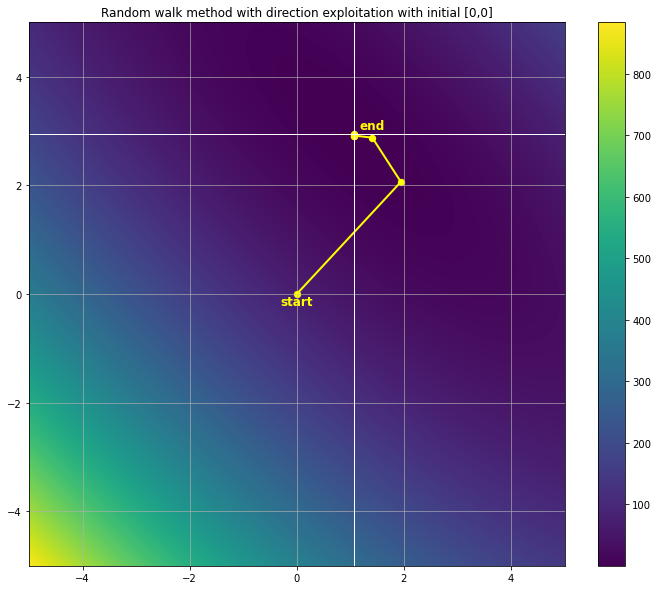

In [58]:
track_movements(2, final_points)

In [377]:
objective([0.9979, 3.0016], 2)

7.969999999999089e-06